# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import pandas as pd

if os.path.exists('config.py'):
    import config as cfg
    os.environ['NEPTUNE_API_TOKEN'] = cfg.NEPTUNE_API_TOKEN
else:
    print('Setup your local configurations!')

if '../../../notebooks/' not in sys.path:
    sys.path.append('../../../notebooks/')

import utils.constants as cts

from models.oface_mouth_model import OpenfaceMouth
from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from model_trainer import BaseModel, Optimizer

# Start Network runner

In [3]:
kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': 'Training mtl network for ALL requisites - 200 epochs - without early_stopping in PYBOSSA GT dataset',
        'tags': ['vgg16', 'ground truths', 'adamax', 'mtl'],
        'src_files': ['exp_runner.py', 'data_processor.py', 'model_trainer.py', 'model_evaluator.py']
    },
    'properties': {
#         'tagger_model': OpenfaceMouth(),
#         'dl_names': {'train_validation':
#                            [DLName.VGGFACE2, DLName.CALTECH, DLName.FVC_PYBOSSA, 
#                             DLName.CVL, DLName.FEI_DB, DLName.GEORGIA_TECH, DLName.COLOR_FERET,
#                             DLName.ICPR04, DLName.IMFDB, DLName.IJBC, DLName.LFW, DLName.CASIA_WF,
#                             DLName.GENKI4K_DB],
#                       'test': [],
        'reqs': list(cts.ICAO_REQ),
        'aligned': True,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [GTName.PYBOSSA]
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 64,
        'n_epochs': 200,
        'early_stopping': 200,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'train_prop': 0.7,
        'validation_prop': 0.15,
        'test_prop': 0.15,
        'validation_split': 0.1,
        'dropout': 0.3
    }
}

runner = ExperimentRunner(**kwargs)

-----
Use Neptune:  True
-----
Args: 
{'exp_params': {'description': 'Training mtl network for ALL requisites - 200 '
                               'epochs - without early_stopping in PYBOSSA GT '
                               'dataset',
                'name': 'train_vgg16',
                'src_files': ['exp_runner.py',
                              'data_processor.py',
                              'model_trainer.py',
                              'model_evaluator.py'],
                'tags': ['vgg16', 'ground truths', 'adamax', 'mtl']},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7fabff858700>}>,
                      'batch_size': 64,
                      'dropout': 0.3,
                      'early_stopping': 200,
                      'learning_rate': 0.001,
                      'n_epochs': 200,
                      'optimizer': <Optimizer.ADAMAX: 'Adamax'>,
                      'test_p

# Load Data

In [4]:
runner.load_training_data()

Loading data
Loading GT PYBOSSA...
..Ignoring 19 empty label values
Input data.shape: (5761, 26)
Data loaded


# Sampling Training Data

In [5]:
runner.sample_training_data()

Not applying subsampling in training data!


# Data Balancing

In [6]:
runner.balance_input_data()

Not balancing input_data


# Data Generators

In [7]:
runner.setup_data_generators()

Starting data generators
Found 4408 validated image filenames.
Found 489 validated image filenames.
Found 864 validated image filenames.
TOTAL: 5761


# Labels Distribution

# Use Neptune

In [8]:
runner.start_neptune()
runner.create_experiment()

Starting Neptune


Creating experiment
https://ui.neptune.ai/guilhermemg/icao-nets-training/e/IC-178


# Create Model

In [9]:
runner.create_model()

Creating model...
Model created


# Vizualize Model

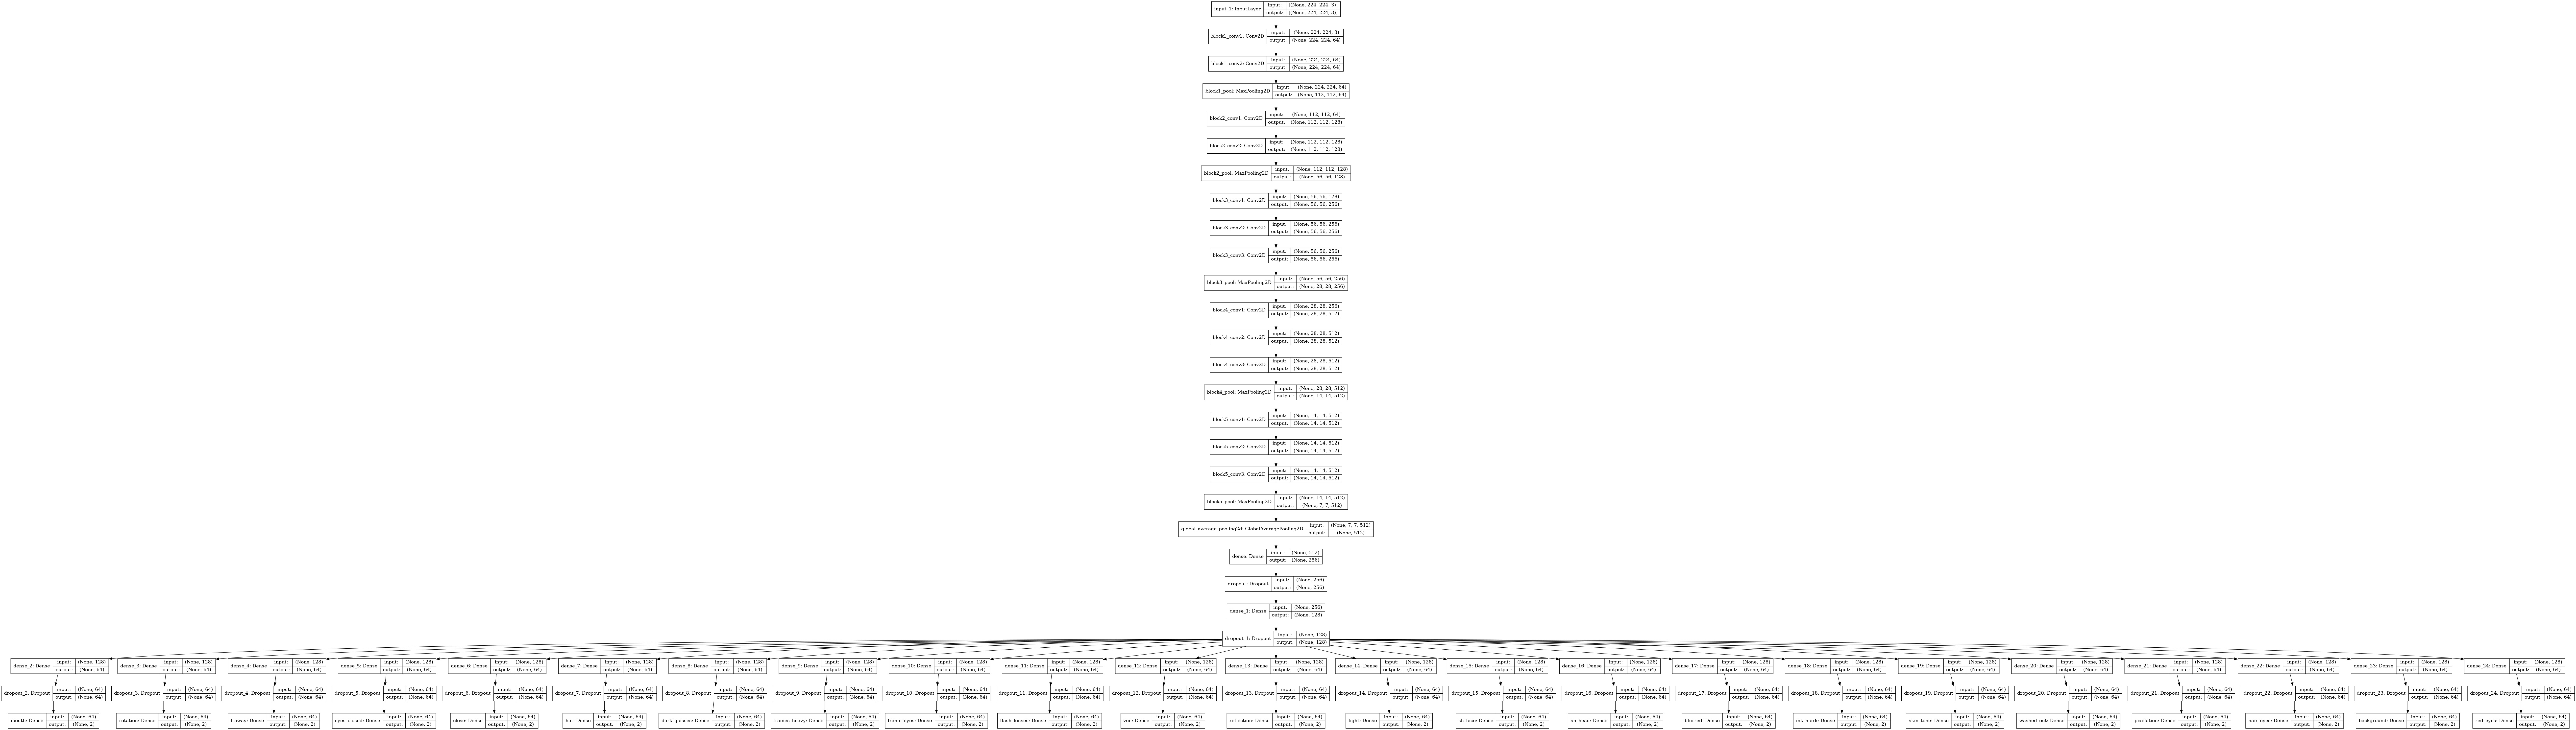

In [10]:
runner.vizualize_model()

# Training Model

In [11]:
runner.train_model()

Training VGG16 network
Epoch 1/200
68/68 [==============================] - 55s 669ms/step - loss: 1.4103 - mouth_loss: 0.6597 - rotation_loss: 0.6527 - l_away_loss: 0.6758 - eyes_closed_loss: 0.6454 - close_loss: 0.4942 - hat_loss: 0.6100 - dark_glasses_loss: 0.6036 - frames_heavy_loss: 0.4941 - frame_eyes_loss: 0.6735 - flash_lenses_loss: 0.6484 - veil_loss: 0.5640 - reflection_loss: 0.6929 - light_loss: 0.5610 - sh_face_loss: 0.6875 - sh_head_loss: 0.6788 - blurred_loss: 0.5810 - ink_mark_loss: 0.4800 - skin_tone_loss: 0.6921 - washed_out_loss: 0.4930 - pixelation_loss: 0.5567 - hair_eyes_loss: 0.6198 - background_loss: 0.6906 - red_eyes_loss: 0.6485 - mouth_accuracy: 0.7005 - rotation_accuracy: 0.7070 - l_away_accuracy: 0.6647 - eyes_closed_accuracy: 0.7553 - close_accuracy: 0.9218 - hat_accuracy: 0.7928 - dark_glasses_accuracy: 0.8358 - frames_heavy_accuracy: 0.9272 - frame_eyes_accuracy: 0.6863 - flash_lenses_accuracy: 0.7489 - veil_accuracy: 0.8778 - reflection_accuracy: 0.5301 

Failed to send channel value.
Traceback (most recent call last):
  File "/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/urllib3/response.py", line 697, in _update_chunk_length
    self.chunk_left = int(line, 16)
ValueError: invalid literal for int() with base 16: b''

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/urllib3/response.py", line 764, in read_chunked
    self._update_chunk_length()
  File "/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/urllib3/response.py", line 701, in _update_chunk_length
    raise InvalidChunkLength(s

68/68 [==============================] - 37s 544ms/step - loss: 0.5772 - mouth_loss: 0.3992 - rotation_loss: 0.4600 - l_away_loss: 0.4099 - eyes_closed_loss: 0.2020 - close_loss: 0.0547 - hat_loss: 0.1795 - dark_glasses_loss: 0.0307 - frames_heavy_loss: 0.0107 - frame_eyes_loss: 0.2944 - flash_lenses_loss: 0.2263 - veil_loss: 0.0293 - reflection_loss: 0.5046 - light_loss: 0.2211 - sh_face_loss: 0.4737 - sh_head_loss: 0.4142 - blurred_loss: 0.1654 - ink_mark_loss: 9.9846e-05 - skin_tone_loss: 0.4904 - washed_out_loss: 0.0368 - pixelation_loss: 0.1982 - hair_eyes_loss: 0.2435 - background_loss: 0.5240 - red_eyes_loss: 0.2031 - mouth_accuracy: 0.8501 - rotation_accuracy: 0.7559 - l_away_accuracy: 0.8489 - eyes_closed_accuracy: 0.9321 - close_accuracy: 0.9881 - hat_accuracy: 0.9497 - dark_glasses_accuracy: 0.9948 - frames_heavy_accuracy: 0.9966 - frame_eyes_accuracy: 0.8826 - flash_lenses_accuracy: 0.9097 - veil_accuracy: 0.9969 - reflection_accuracy: 0.7558 - light_accuracy: 0.9222 - sh_f

# Plots

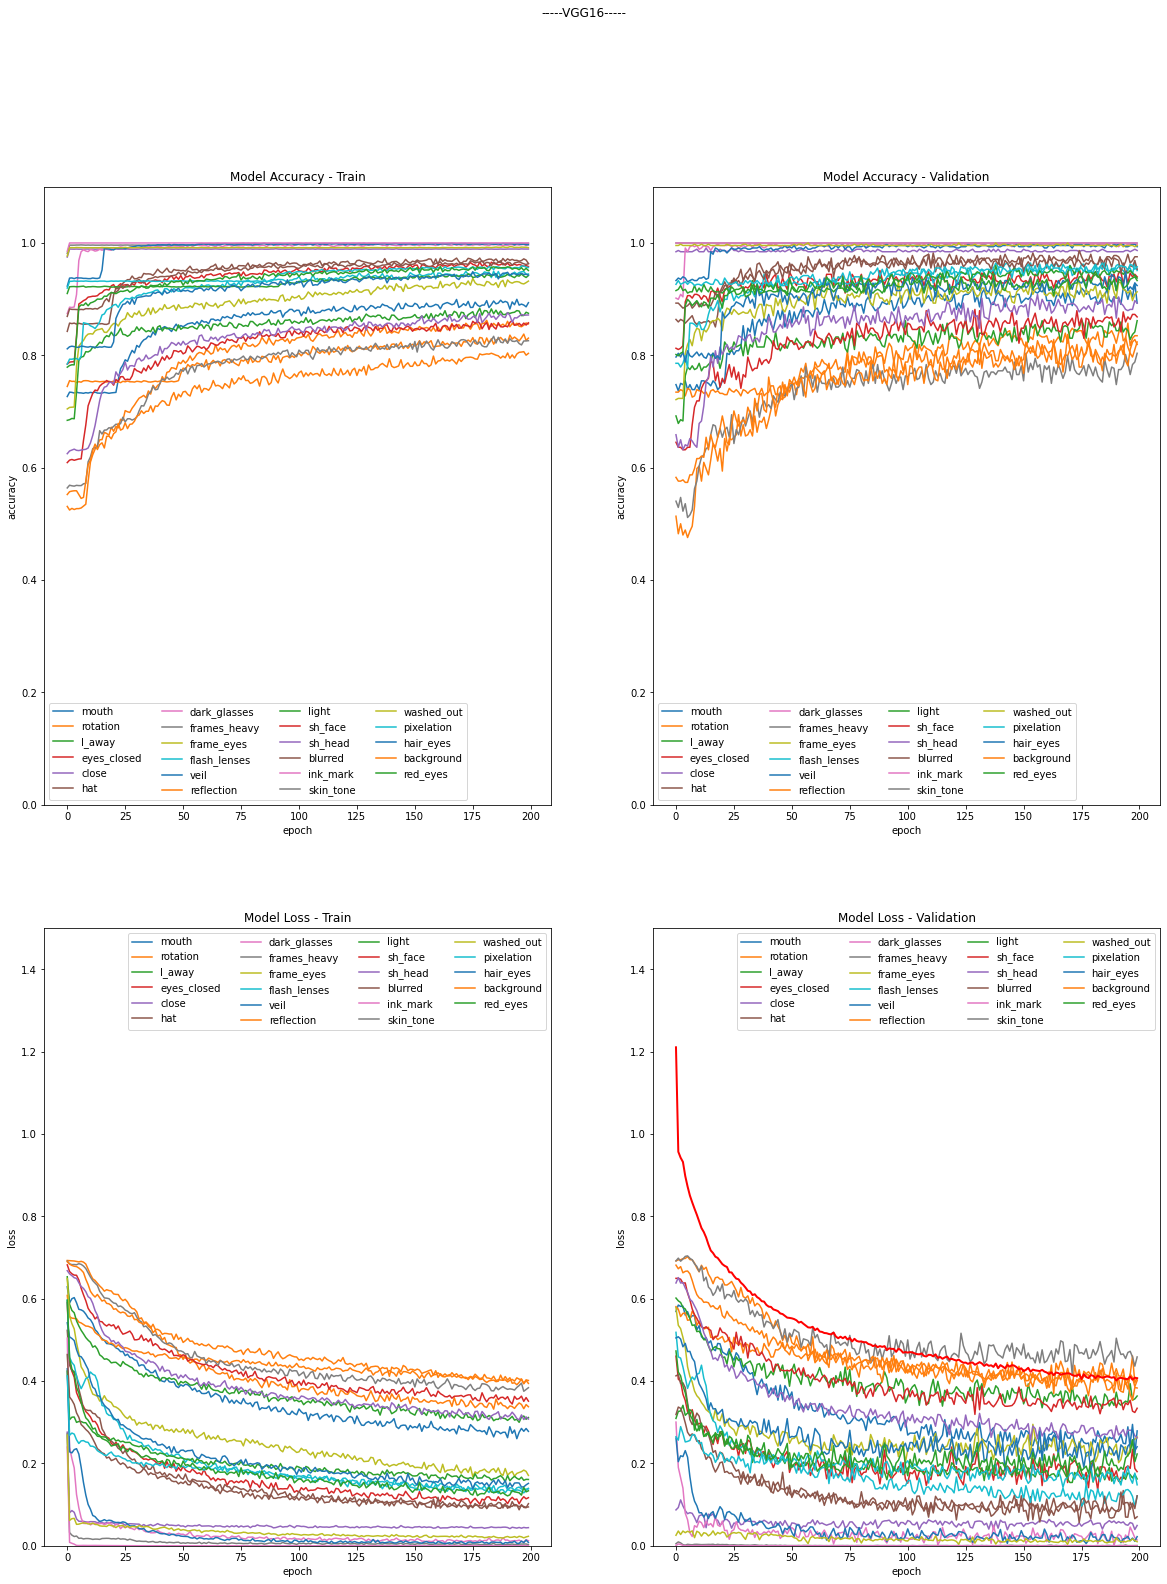

In [12]:
runner.draw_training_history()

# Load Best Model

In [13]:
runner.load_best_model()

..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [14]:
runner.save_model()

Saving model
..Saving tf model
INFO:tensorflow:Assets written to: trained_models/model/assets
..TF model saved
..Saving model to neptune..
Model saved


# Test Trained Model

Testing Trained Model
Predicting labels....
Prediction finished!
Requisite: MOUTH
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.87      0.72      0.79       220
    COMPLIANT       0.91      0.96      0.94       644

     accuracy                           0.90       864
    macro avg       0.89      0.84      0.86       864
 weighted avg       0.90      0.90      0.90       864

Accuracy ------------------------------------------------
Model Accuracy: 90.28%
---------------------------------------------------------


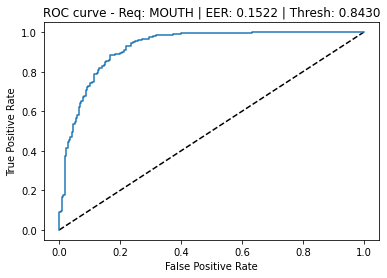

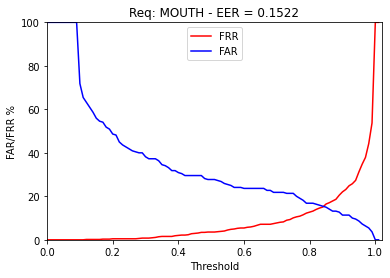

Requisite: ICAO_REQ.MOUTH - EER: 15.2174% - Best Threshold: 0.8429594454558204
Confusion matrix ----------------------------------------
TP: 621 | TN: 159 | FP: 61 | FN: 23
Requisite: ROTATION
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.67      0.53      0.59       212
    COMPLIANT       0.86      0.92      0.89       652

     accuracy                           0.82       864
    macro avg       0.77      0.72      0.74       864
 weighted avg       0.81      0.82      0.81       864

Accuracy ------------------------------------------------
Model Accuracy: 82.18%
---------------------------------------------------------


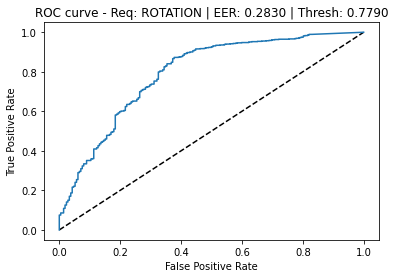

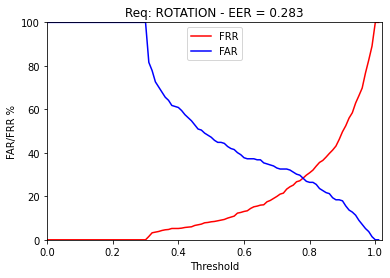

Requisite: ICAO_REQ.ROTATION - EER: 28.3019% - Best Threshold: 0.7790228128433013
Confusion matrix ----------------------------------------
TP: 598 | TN: 112 | FP: 100 | FN: 54
Requisite: L_AWAY
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.89      0.65      0.75       268
    COMPLIANT       0.86      0.96      0.91       596

     accuracy                           0.87       864
    macro avg       0.88      0.81      0.83       864
 weighted avg       0.87      0.87      0.86       864

Accuracy ------------------------------------------------
Model Accuracy: 86.69%
---------------------------------------------------------


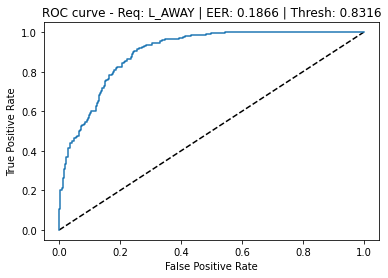

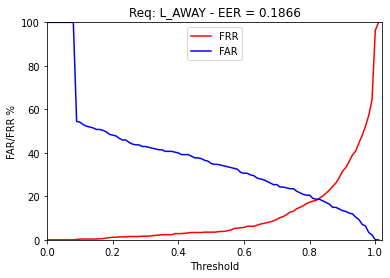

Requisite: ICAO_REQ.L_AWAY - EER: 18.6567% - Best Threshold: 0.831639349460798
Confusion matrix ----------------------------------------
TP: 575 | TN: 174 | FP: 94 | FN: 21
Requisite: EYES_CLOSED
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.94      0.77      0.85       176
    COMPLIANT       0.94      0.99      0.97       688

     accuracy                           0.94       864
    macro avg       0.94      0.88      0.91       864
 weighted avg       0.94      0.94      0.94       864

Accuracy ------------------------------------------------
Model Accuracy: 94.44%
---------------------------------------------------------


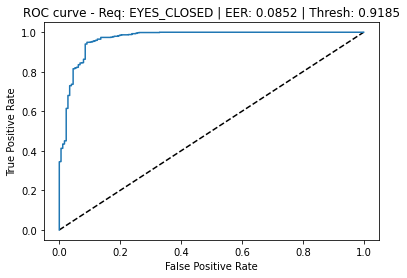

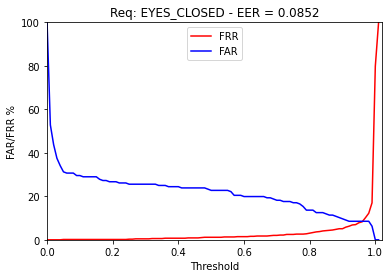

Requisite: ICAO_REQ.EYES_CLOSED - EER: 8.5227% - Best Threshold: 0.9184774756430593
Confusion matrix ----------------------------------------
TP: 680 | TN: 136 | FP: 40 | FN: 8
Requisite: CLOSE
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.00      0.00      0.00         6
    COMPLIANT       0.99      1.00      1.00       858

     accuracy                           0.99       864
    macro avg       0.50      0.50      0.50       864
 weighted avg       0.99      0.99      0.99       864

Accuracy ------------------------------------------------
Model Accuracy: 99.31%
---------------------------------------------------------


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


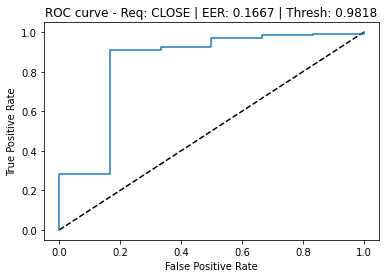

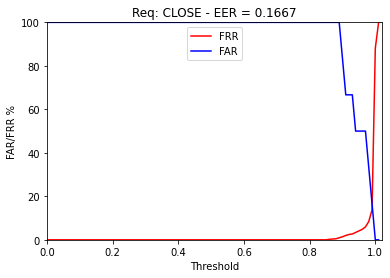

Requisite: ICAO_REQ.CLOSE - EER: 16.6667% - Best Threshold: 0.981839835643768
Confusion matrix ----------------------------------------
TP: 858 | TN: 0 | FP: 6 | FN: 0
Requisite: HAT
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.96      0.90      0.93       139
    COMPLIANT       0.98      0.99      0.99       725

     accuracy                           0.98       864
    macro avg       0.97      0.95      0.96       864
 weighted avg       0.98      0.98      0.98       864

Accuracy ------------------------------------------------
Model Accuracy: 97.8%
---------------------------------------------------------


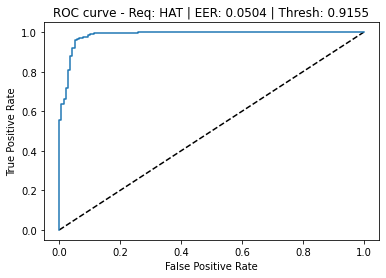

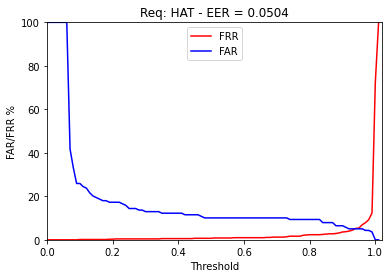

Requisite: ICAO_REQ.HAT - EER: 5.036% - Best Threshold: 0.9155213236808242
Confusion matrix ----------------------------------------
TP: 720 | TN: 125 | FP: 14 | FN: 5
Requisite: DARK_GLASSES
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.98      1.00      0.99        98
    COMPLIANT       1.00      1.00      1.00       766

     accuracy                           1.00       864
    macro avg       0.99      1.00      0.99       864
 weighted avg       1.00      1.00      1.00       864

Accuracy ------------------------------------------------
Model Accuracy: 99.77%
---------------------------------------------------------


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:623: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:626: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


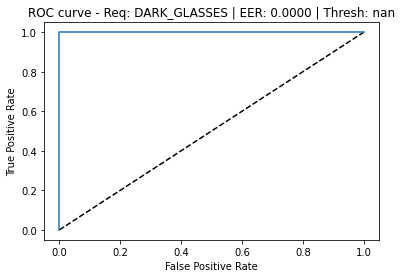

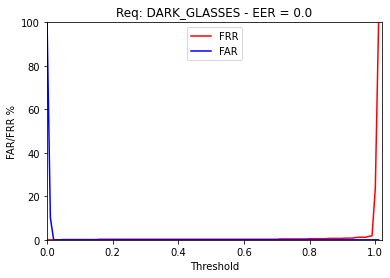

Invalid metric value: nan for channel best_th. Metrics with nan or +/-inf values will not be sent to server


Requisite: ICAO_REQ.DARK_GLASSES - EER: 0.0% - Best Threshold: nan
Confusion matrix ----------------------------------------
TP: 764 | TN: 98 | FP: 0 | FN: 2
Requisite: FRAMES_HEAVY
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      1.00      1.00         2
    COMPLIANT       1.00      1.00      1.00       862

     accuracy                           1.00       864
    macro avg       1.00      1.00      1.00       864
 weighted avg       1.00      1.00      1.00       864

Accuracy ------------------------------------------------
Model Accuracy: 100.0%
---------------------------------------------------------


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:623: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:626: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


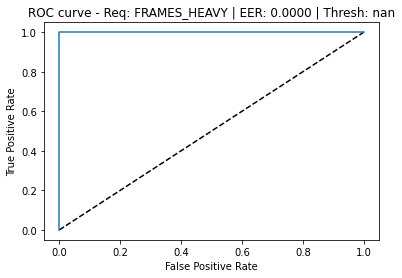

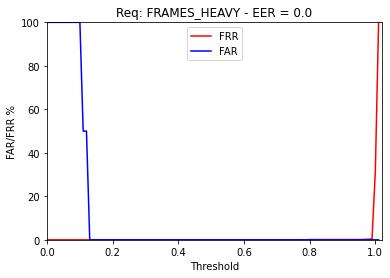

Invalid metric value: nan for channel best_th. Metrics with nan or +/-inf values will not be sent to server


Requisite: ICAO_REQ.FRAMES_HEAVY - EER: 0.0% - Best Threshold: nan
Confusion matrix ----------------------------------------
TP: 862 | TN: 2 | FP: 0 | FN: 0
Requisite: FRAME_EYES
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.90      0.82      0.86       256
    COMPLIANT       0.93      0.96      0.94       608

     accuracy                           0.92       864
    macro avg       0.91      0.89      0.90       864
 weighted avg       0.92      0.92      0.92       864

Accuracy ------------------------------------------------
Model Accuracy: 91.9%
---------------------------------------------------------


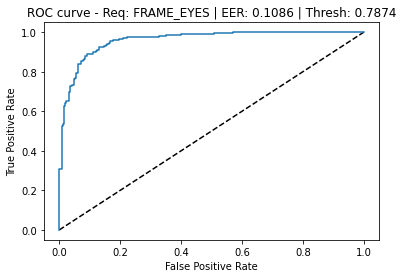

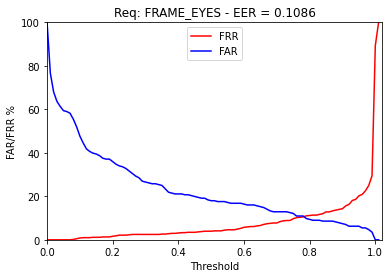

Requisite: ICAO_REQ.FRAME_EYES - EER: 10.8553% - Best Threshold: 0.7873709923342658
Confusion matrix ----------------------------------------
TP: 584 | TN: 210 | FP: 46 | FN: 24
Requisite: FLASH_LENSES
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.84      0.86      0.85       189
    COMPLIANT       0.96      0.96      0.96       675

     accuracy                           0.93       864
    macro avg       0.90      0.91      0.90       864
 weighted avg       0.93      0.93      0.93       864

Accuracy ------------------------------------------------
Model Accuracy: 93.4%
---------------------------------------------------------


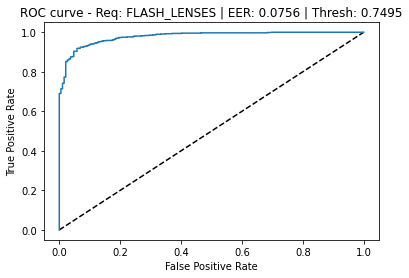

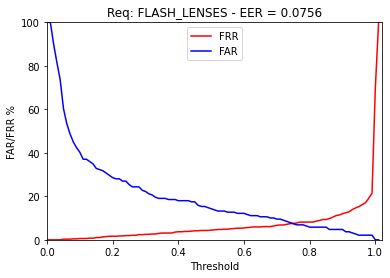

Requisite: ICAO_REQ.FLASH_LENSES - EER: 7.5556% - Best Threshold: 0.749480102062225
Confusion matrix ----------------------------------------
TP: 645 | TN: 162 | FP: 27 | FN: 30
Requisite: VEIL
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.89      0.94        56
    COMPLIANT       0.99      1.00      1.00       808

     accuracy                           0.99       864
    macro avg       1.00      0.95      0.97       864
 weighted avg       0.99      0.99      0.99       864

Accuracy ------------------------------------------------
Model Accuracy: 99.31%
---------------------------------------------------------


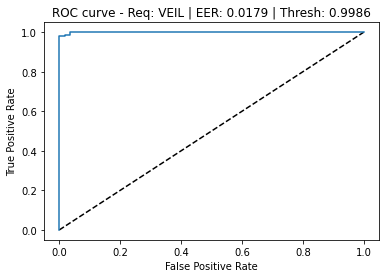

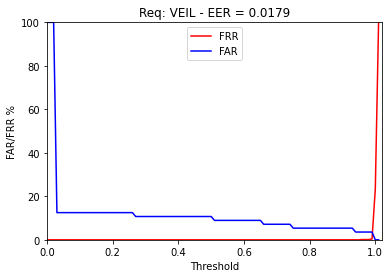

Requisite: ICAO_REQ.VEIL - EER: 1.7857% - Best Threshold: 0.998634755611414
Confusion matrix ----------------------------------------
TP: 808 | TN: 50 | FP: 6 | FN: 0
Requisite: REFLECTION
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.85      0.75      0.80       409
    COMPLIANT       0.80      0.88      0.84       455

     accuracy                           0.82       864
    macro avg       0.82      0.81      0.82       864
 weighted avg       0.82      0.82      0.82       864

Accuracy ------------------------------------------------
Model Accuracy: 81.83%
---------------------------------------------------------


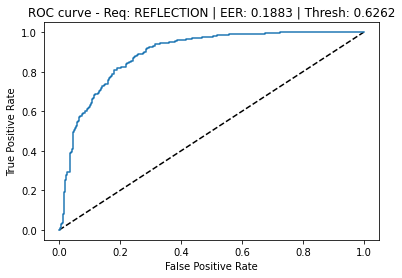

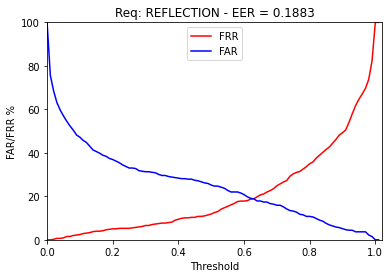

Requisite: ICAO_REQ.REFLECTION - EER: 18.8264% - Best Threshold: 0.6261975169175991
Confusion matrix ----------------------------------------
TP: 401 | TN: 306 | FP: 103 | FN: 54
Requisite: LIGHT
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.92      0.30      0.45        81
    COMPLIANT       0.93      1.00      0.96       783

     accuracy                           0.93       864
    macro avg       0.93      0.65      0.71       864
 weighted avg       0.93      0.93      0.92       864

Accuracy ------------------------------------------------
Model Accuracy: 93.17%
---------------------------------------------------------


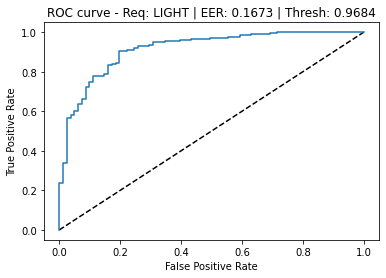

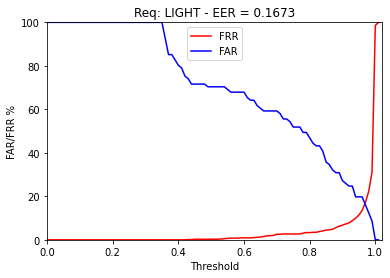

Requisite: ICAO_REQ.LIGHT - EER: 16.7305% - Best Threshold: 0.9684028625488281
Confusion matrix ----------------------------------------
TP: 781 | TN: 24 | FP: 57 | FN: 2
Requisite: SH_FACE
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.85      0.73      0.79       325
    COMPLIANT       0.85      0.92      0.89       539

     accuracy                           0.85       864
    macro avg       0.85      0.83      0.84       864
 weighted avg       0.85      0.85      0.85       864

Accuracy ------------------------------------------------
Model Accuracy: 85.07%
---------------------------------------------------------


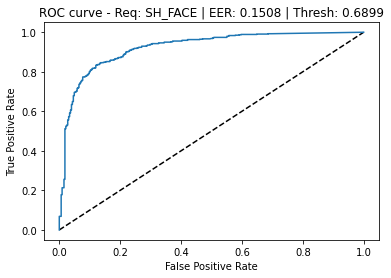

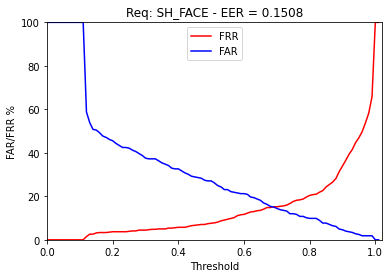

Requisite: ICAO_REQ.SHADOW_FACE - EER: 15.0769% - Best Threshold: 0.6898673772809462
Confusion matrix ----------------------------------------
TP: 498 | TN: 237 | FP: 88 | FN: 41
Requisite: SH_HEAD
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.84      0.82      0.83       329
    COMPLIANT       0.89      0.91      0.90       535

     accuracy                           0.87       864
    macro avg       0.87      0.86      0.87       864
 weighted avg       0.87      0.87      0.87       864

Accuracy ------------------------------------------------
Model Accuracy: 87.38%
---------------------------------------------------------


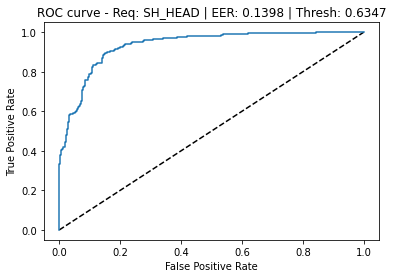

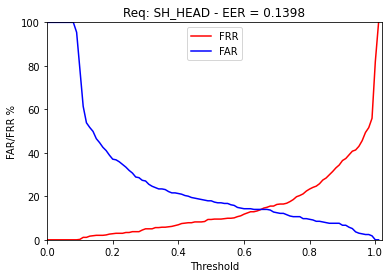

Requisite: ICAO_REQ.SHADOW_HEAD - EER: 13.9818% - Best Threshold: 0.6347123980486419
Confusion matrix ----------------------------------------
TP: 485 | TN: 270 | FP: 59 | FN: 50
Requisite: BLURRED
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.98      0.56      0.71        89
    COMPLIANT       0.95      1.00      0.97       775

     accuracy                           0.95       864
    macro avg       0.97      0.78      0.84       864
 weighted avg       0.95      0.95      0.95       864

Accuracy ------------------------------------------------
Model Accuracy: 95.37%
---------------------------------------------------------


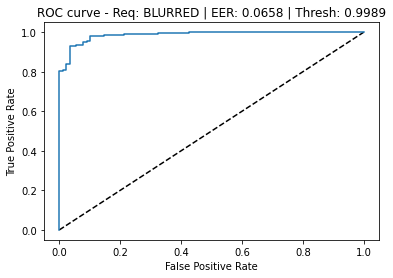

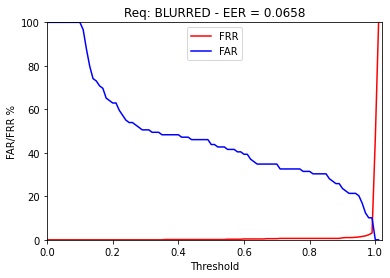

Requisite: ICAO_REQ.BLURRED - EER: 6.5806% - Best Threshold: 0.998916563987732
Confusion matrix ----------------------------------------
TP: 774 | TN: 50 | FP: 39 | FN: 1
Requisite: SKIN_TONE
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.77      0.70      0.74       372
    COMPLIANT       0.79      0.84      0.82       492

     accuracy                           0.78       864
    macro avg       0.78      0.77      0.78       864
 weighted avg       0.78      0.78      0.78       864

Accuracy ------------------------------------------------
Model Accuracy: 78.36%
---------------------------------------------------------


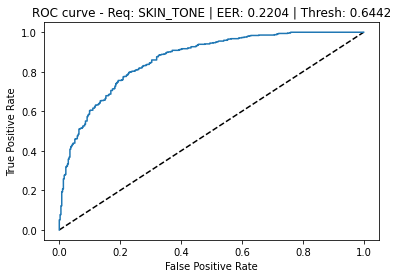

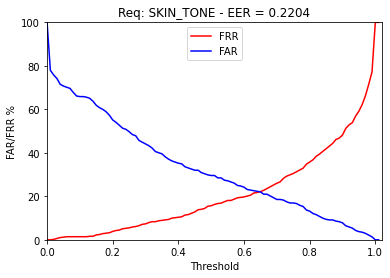

Requisite: ICAO_REQ.SKIN_TONE - EER: 22.043% - Best Threshold: 0.644234836101121
Confusion matrix ----------------------------------------
TP: 415 | TN: 262 | FP: 110 | FN: 77
Requisite: WASHED_OUT
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.09      0.17        11
    COMPLIANT       0.99      1.00      0.99       853

     accuracy                           0.99       864
    macro avg       0.99      0.55      0.58       864
 weighted avg       0.99      0.99      0.98       864

Accuracy ------------------------------------------------
Model Accuracy: 98.84%
---------------------------------------------------------


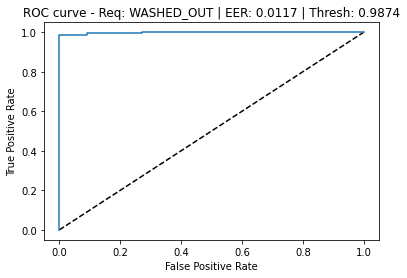

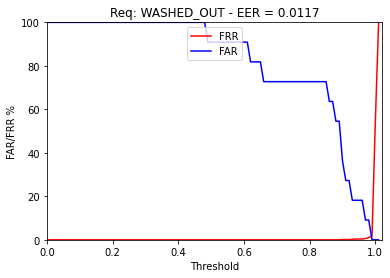

Requisite: ICAO_REQ.WASHED_OUT - EER: 1.1723% - Best Threshold: 0.9873555437481558
Confusion matrix ----------------------------------------
TP: 853 | TN: 1 | FP: 10 | FN: 0
Requisite: PIXELATION
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.50      0.67        58
    COMPLIANT       0.97      1.00      0.98       806

     accuracy                           0.97       864
    macro avg       0.98      0.75      0.82       864
 weighted avg       0.97      0.97      0.96       864

Accuracy ------------------------------------------------
Model Accuracy: 96.64%
---------------------------------------------------------


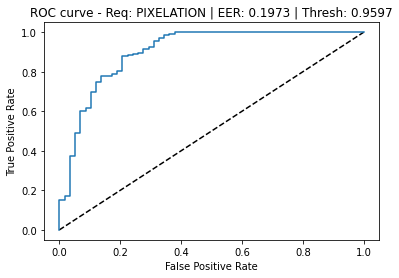

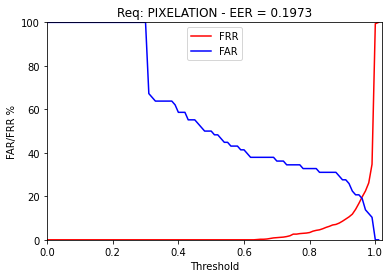

Requisite: ICAO_REQ.PIXELATION - EER: 19.727% - Best Threshold: 0.9597480391746124
Confusion matrix ----------------------------------------
TP: 806 | TN: 29 | FP: 29 | FN: 0
Requisite: HAIR_EYES
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.86      0.72      0.78       144
    COMPLIANT       0.95      0.98      0.96       720

     accuracy                           0.93       864
    macro avg       0.90      0.85      0.87       864
 weighted avg       0.93      0.93      0.93       864

Accuracy ------------------------------------------------
Model Accuracy: 93.4%
---------------------------------------------------------


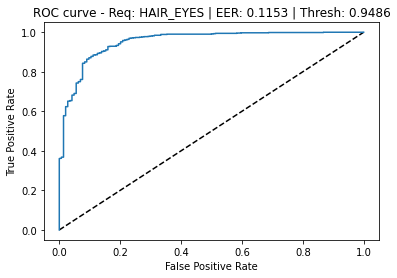

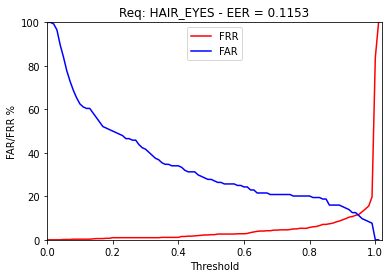

Requisite: ICAO_REQ.HAIR_EYES - EER: 11.5278% - Best Threshold: 0.9485940098762509
Confusion matrix ----------------------------------------
TP: 703 | TN: 104 | FP: 40 | FN: 17
Requisite: BACKGROUND
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.77      0.83      0.80       396
    COMPLIANT       0.85      0.79      0.82       468

     accuracy                           0.81       864
    macro avg       0.81      0.81      0.81       864
 weighted avg       0.81      0.81      0.81       864

Accuracy ------------------------------------------------
Model Accuracy: 80.79%
---------------------------------------------------------


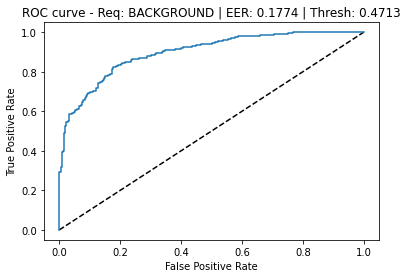

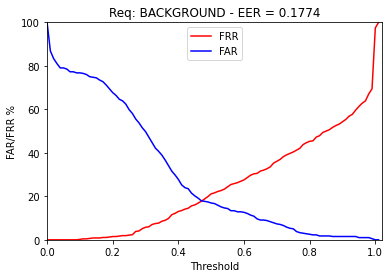

Requisite: ICAO_REQ.BACKGROUND - EER: 17.735% - Best Threshold: 0.4713326864517652
Confusion matrix ----------------------------------------
TP: 369 | TN: 329 | FP: 67 | FN: 99
Requisite: RED_EYES
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.92      0.76      0.83       178
    COMPLIANT       0.94      0.98      0.96       686

     accuracy                           0.94       864
    macro avg       0.93      0.87      0.90       864
 weighted avg       0.94      0.94      0.94       864

Accuracy ------------------------------------------------
Model Accuracy: 93.75%
---------------------------------------------------------


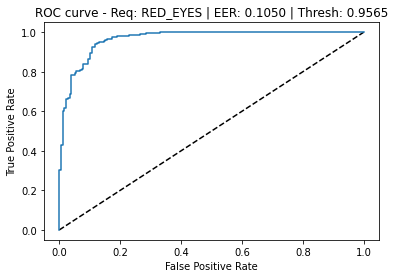

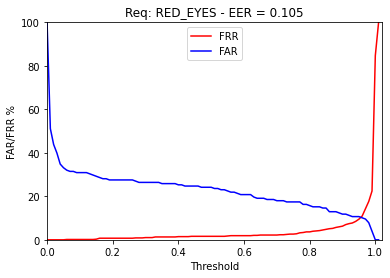

Requisite: ICAO_REQ.RED_EYES - EER: 10.4956% - Best Threshold: 0.956469797010672
Confusion matrix ----------------------------------------
TP: 675 | TN: 135 | FP: 43 | FN: 11


In [15]:
runner.test_model()

# Evaluate Model

In [16]:
runner.evaluate_model()

Evaluating model
Loss: 0.4921
Accuracy: 29.68%


# Vizualize Model Classification

# Finishing Experiment Manager

In [17]:
runner.finish_experiment()

Finishing Neptune
